<a href="https://colab.research.google.com/github/seifahmed2004/ML-Project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [49]:
df = pd.read_csv("/content/mhealth_raw_data.csv")
df
# !kaggle datasets download -d gaurav2022/mobile-health


# !unzip mobile-health.zip


# df = pd.read_csv('mhealth_raw_data.csv')

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.010300,0.034483,0.0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.010300,0.034483,0.0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.010300,0.034483,0.0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.008200,0.025862,0.0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.008200,0.025862,0.0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577990,1.2639,-9.6193,0.44834,-0.586270,-0.82176,0.14342,-8.8481,-5.2232,0.676340,-1.01960,-0.032854,-0.217670,0.0,subject5
577991,1.5611,-9.8781,0.31337,-0.593690,-0.81801,0.14145,-8.2049,-5.0648,0.517590,-0.97255,-0.158110,-0.271550,0.0,subject5
577992,1.6284,-9.6022,0.17159,-0.593690,-0.81801,0.14145,-7.9190,-5.3857,0.428630,-0.97255,-0.158110,-0.271550,0.0,subject5
577993,1.6096,-9.6605,0.28307,-0.593690,-0.81801,0.14145,-7.5739,-5.6366,0.343170,-0.97255,-0.158110,-0.271550,0.0,subject5


In [50]:
df_subset = df.iloc[50000:50100]
print(df_subset)

          alx     aly      alz      glx      gly      glz     arx     ary  \
50000  2.2716 -9.3919  0.41771 -0.34508 -0.78049  0.36149 -3.6387 -9.2130   
50001  2.1813 -9.5103  0.45255 -0.34508 -0.78049  0.36149 -3.8422 -9.1820   
50002  2.1922 -9.5296  0.50377 -0.34508 -0.78049  0.36149 -3.8927 -9.2516   
50003  2.3170 -9.6572  0.61322 -0.34508 -0.78049  0.36149 -3.9181 -9.2432   
50004  2.2754 -9.6680  0.52894 -0.34508 -0.78049  0.36149 -4.0132 -9.1817   
...       ...     ...      ...      ...      ...      ...     ...     ...   
50095  2.2541 -9.3989  0.70885 -0.35436 -0.77861  0.36739 -3.0236 -9.2480   
50096  2.2835 -9.4602  0.51858 -0.35436 -0.77861  0.36739 -3.0167 -9.3067   
50097  2.1406 -9.4402  0.53898 -0.35436 -0.77861  0.36739 -3.1062 -9.1375   
50098  2.4484 -9.6385  0.51131 -0.35250 -0.79362  0.36739 -2.9521 -9.1388   
50099  2.2549 -9.7281  0.45281 -0.35250 -0.79362  0.36739 -2.8313 -9.0959   

          arz      grx      gry       grz  Activity   subject  
50000  1.69

<Axes: >

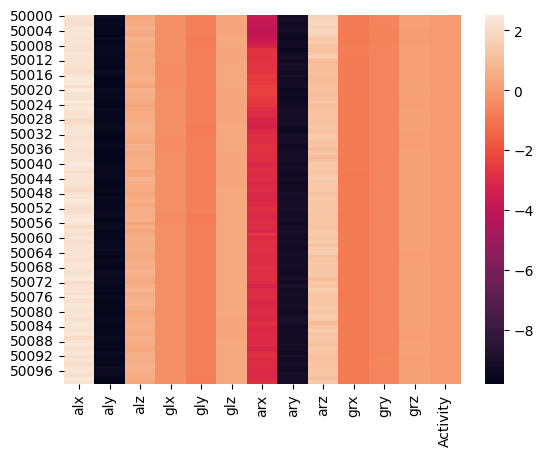

In [51]:
import seaborn as sns
X = df_subset.drop('subject',axis=1)
sns.heatmap(X)


Sample data points:
      alx     aly      alz       glx      gly      glz     arx     ary  \
0  2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1  2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2  2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3  2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4  2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   

        arz      grx     gry       grz  Activity   subject  
0  0.187760 -0.44902 -1.0103  0.034483       0.0  subject1  
1  0.023595 -0.44902 -1.0103  0.034483       0.0  subject1  
2  0.275720 -0.44902 -1.0103  0.034483       0.0  subject1  
3  0.367520 -0.45686 -1.0082  0.025862       0.0  subject1  
4  0.407290 -0.45686 -1.0082  0.025862       0.0  subject1  


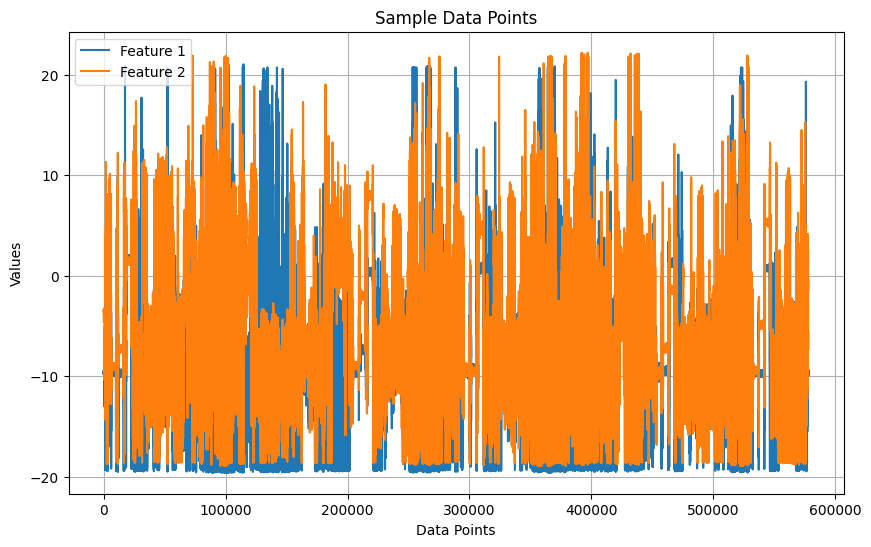

In [52]:
#Visualization of sample data points
print("Sample data points:")
print(df.head())
plt.figure(figsize=(10, 6))

plt.plot(df['aly'], label='Feature 1')
plt.plot(df['ary'], label='Feature 2')

plt.title('Sample Data Points')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle = True, random_state=0)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)


X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


In [55]:
X.head()


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0.0
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0.0
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0.0
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0.0
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0.0


In [56]:
y.head()

0    subject1
1    subject1
2    subject1
3    subject1
4    subject1
Name: subject, dtype: object

In [57]:
df_no_duplicates = df.drop_duplicates()
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing duplicates:", df_no_duplicates.shape)

Original DataFrame shape: (577995, 14)
DataFrame shape after removing duplicates: (577995, 14)


In [58]:
print (f"training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples ")

training set size: 462396 samples 
test set size: 115599 samples 


In [59]:
from collections import Counter
from sklearn.metrics import accuracy_score

In [60]:
X_train = pd.DataFrame(X_train)
X_train = X_train.dropna()
y_train = pd.DataFrame(y_train)
y_train = y_train.dropna()

In [61]:
#https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/

from sklearn.neighbors import KNeighborsClassifier

# Create an instance of KNeighborsClassifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using your training data
knn.fit(X_train, y_train)

# Make predictions on the test data
predictions = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [62]:
knn

KNeighborsClassifier(n_neighbors=3)

In [63]:
class svm_hard_margin:

  weights = []
  bias = 0

  def fit(self, x, y, learning_rate, epochs):
    n_samples, n_features = x.shape
    self.weights = np.zeros(n_features)

    for epoch in range(1, epochs + 1):
        for j in range(n_samples):
            condition = y[j] * (np.dot(x[j], self.weights) + self.bias) >= 1
            if not condition:
                # Misclassification, update weights and bias
                self.weights += learning_rate * (x[j] * y[j] - 2 * 1/epoch * self.weights)
                self.bias += learning_rate * y[j]

  def predict(self, x):
    predictions = np.dot(x, self.weights) + self.bias
    predictions = np.sign(predictions)
    return predictions

In [64]:
# from sklearn.svm import SVC
# y_train = y_train[:316684]
# svm = SVC(C=10, kernel='rbf')
# svm.fit(X_train, y_train)

In [65]:
# plot_decision_regions(X_train, y_train, clf=svm, legend=2)

# plt.title('SVM')
# plt.show()

In [66]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [67]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3, random_state=1)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(404596, 13) (86699, 13) (86700, 13) (404596,) (86699,) (86700,)


In [68]:
1022/32

31.9375

In [69]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense #makes summation, activation
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam

In [70]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(10,)), #vector
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [71]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [72]:
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [73]:
from keras import layers

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

print("Fit model on training data")


Fit model on training data


In [74]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch

    validation_data=(x_val, y_val),
)


Epoch 1/2
782/782 [==============================] - 5s 6ms/step - loss: 0.3530 - accuracy: 0.8996 - val_loss: 0.1851 - val_accuracy: 0.9465
Epoch 2/2
782/782 [==============================] - 3s 3ms/step - loss: 0.1571 - accuracy: 0.9537 - val_loss: 0.1306 - val_accuracy: 0.9616


In [75]:
from sklearn.model_selection import train_test_split

# Assuming you have your input data X and target data y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training set shapes - X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("Testing set shapes - X_test: {}, y_test: {}".format(X_test.shape, y_test.shape))


Training set shapes - X_train: (462396, 13), y_train: (462396,)
Testing set shapes - X_test: (115599, 13), y_test: (115599,)


In [76]:
X_test_adj = X_test[:5000]
y_test_adj = y_test[:5000]

In [77]:
# model.evaluate(X_test_adj, y_test_adj)

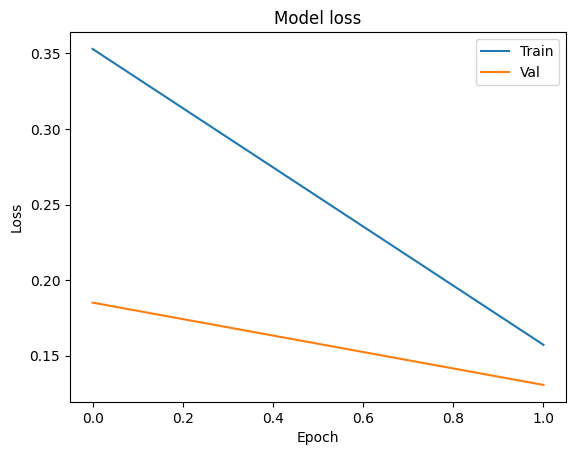

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

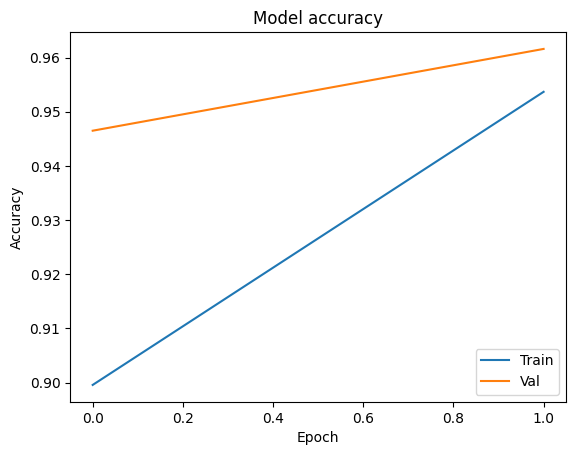

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [80]:
#Define sigmoid function
def sigmoid(z):
    #output > 0.5 when z is positive
    #output < 0.5 when z is negative
    return 1/(1+np.exp(-z)) # Output in range [0,1]

In [81]:
x= np.arange(-20,20)
y= np.round(sigmoid(x),2)

Text(0, 0.5, 'Logistic/sigmoid function applied')

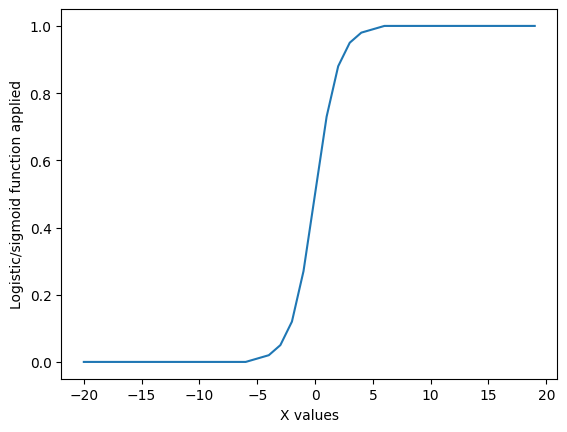

In [82]:
plt.plot(x, y)
plt.xlabel('X values')
plt.ylabel('Logistic/sigmoid function applied')

In [83]:
df.isna().sum()

alx         0
aly         0
alz         1
glx         1
gly         1
glz         1
arx         1
ary         1
arz         1
grx         1
gry         1
grz         1
Activity    1
subject     1
dtype: int64

In [84]:
df.duplicated().sum()

0

In [85]:
df['alx'].value_counts()

alx
 19.59600    77
 19.58600    66
 19.60600    50
 19.57500    47
-21.76300    41
             ..
 0.36886      1
 0.42650      1
 0.47949      1
 0.32889      1
 0.98972      1
Name: count, Length: 243000, dtype: int64

In [93]:
X = df.drop('subject',axis=1)
y = df['subject']
# Convert all columns in X to integers
# X = X.astype(int)

# # Convert y to integers
# y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle=True)
X_train = pd.DataFrame(X_train)
X_train = X_train.dropna()
y_train = pd.DataFrame(y_train)
y_train = y_train.dropna()

In [94]:
clf = LogisticRegression()
clf.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
y_pred=clf.predict(X_test)
y_pred

array(['subject1', 'subject1', 'subject4', ..., 'subject2', 'subject3',
       'subject1'], dtype=object)

In [96]:
print(accuracy_score(y_test,y_pred))

0.3872524848830872


In [97]:
confusion_matrix(y_test, y_pred)

array([[20247,  5833,  3604,  2393,   169],
       [10886,  7316,  2934,  5105,    18],
       [ 7985,  3077,  6463,  6892,   256],
       [ 6097,  2897,  3804, 10080,   171],
       [ 3166,   734,  2275,  2537,   660]])

In [90]:
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC


In [91]:
X = df[['aly', 'ary']].values
y = df['subject'].values

X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=42)

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]


In [92]:
# clf = svm.SVC(kernel='linear', C=1, random_state=42)
# scores = cross_val_score(clf, X, y, cv=5)
# scores